# Insight Face

In [4]:
import numpy as np
import os
import glob
import cv2
import matplotlib.pyplot as plt

import insightface
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image

In [5]:
print('insightface',insightface.__version__)
print('numpy', np.__version__)

insightface 0.7.3
numpy 1.26.1


## Detecting faces

In [6]:
app = FaceAnalysis(name= 'buffalo_l')
app.prepare(ctx_id= 0, det_size= (640, 640))

d:\Cesar\BeCode\Projects\FaceSwapping\.venv\Lib\site-packages\onnxruntime\capi\onnxruntime_inference_collection.py:69: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\Cesar/.insightface\models\buffalo_l\1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\Cesar/.insightface\models\buffalo_l\2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\Cesar/.insightface\models\buffalo_l\det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\Cesar/.insightface\models\buffalo_l\genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\Cesar/.insightface\models\buffalo_l\w600k_r50.onnx recognition ['None', 3, 112, 112] 127.

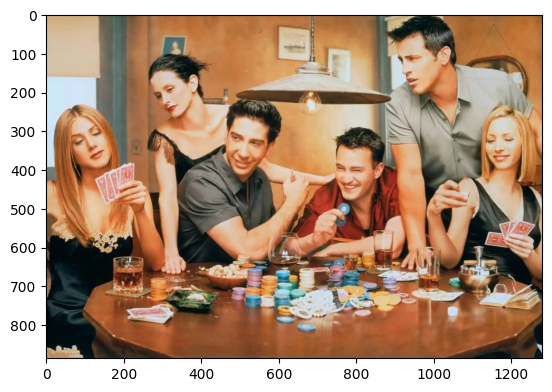

In [7]:
img = ins_get_image('t1')
plt.imshow(img[:,:,::-1])
plt.show()

In [8]:
faces = app.get(img)

d:\Cesar\BeCode\Projects\FaceSwapping\.venv\Lib\site-packages\insightface\utils\transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


In [9]:
len(faces)

6

In [10]:
faces[0].keys()

dict_keys(['bbox', 'kps', 'det_score', 'landmark_3d_68', 'pose', 'landmark_2d_106', 'gender', 'age', 'embedding'])

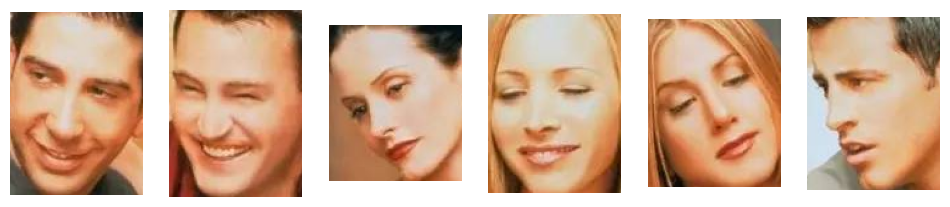

In [11]:
fig, axs = plt.subplots(1,6, figsize= (12, 5))

for i, face in enumerate(faces):
    bbox= face['bbox']
    bbox= [int(b) for b in bbox]
    axs[i].imshow(img[bbox[1]:bbox[3], bbox[0]:bbox[2],::-1])
    axs[i].axis('off')


## Face Swapping

In [12]:
swapper= insightface.model_zoo.get_model('inswapper_128.onnx',
                                         download=False,
                                         download_zip=False)

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
inswapper-shape: [1, 3, 128, 128]


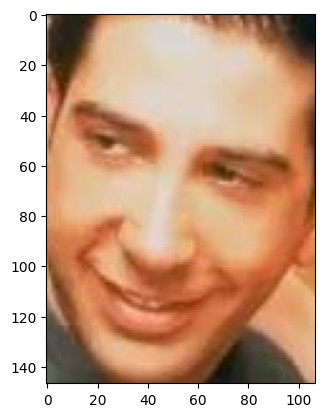

In [14]:
source_face= faces[0]
bbox= source_face['bbox']
bbox= [int(b) for b in bbox]
plt.imshow(img[bbox[1]:bbox[3], bbox[0]:bbox[2],::-1])
plt.show()

In [23]:
res= img.copy()

for face in faces:
    res= swapper.get(res, face, source_face, paste_back=True)

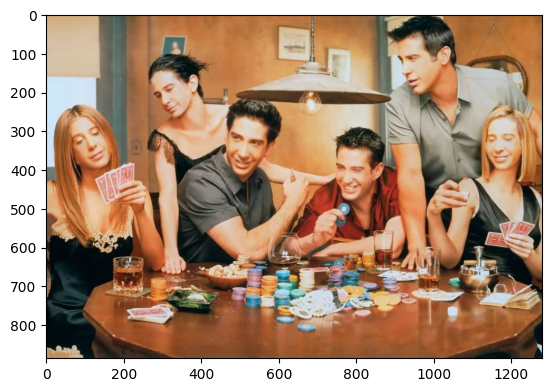

In [24]:
plt.imshow(res[:,:,::-1])
plt.show()

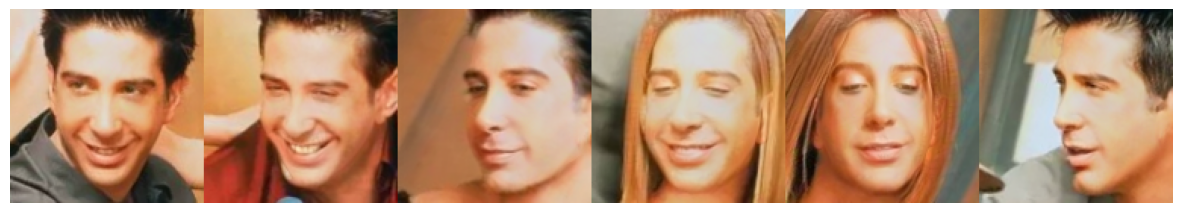

In [18]:
res= []

for face in faces:
    _img, _ = swapper.get(img, face, source_face, paste_back=False)
    res.append(_img)

res= np.concatenate(res, axis= 1)
fig, ax= plt.subplots(figsize=(15,5))
ax.imshow(res[:,:,::-1])
ax.axis('off')
plt.show()

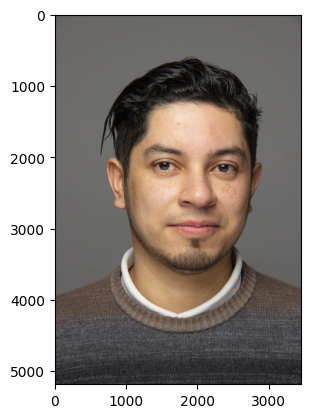

In [30]:
rob= cv2.imread('img\cesar.jpg')
plt.imshow(rob[:,:,::-1])
plt.show()

In [31]:
# detecting the face
rob_face= app.get(rob)

# replacing faces in friends image
res= img.copy()
for face in faces:
    res= swapper.get(res, face, rob_face[0], paste_back=True)



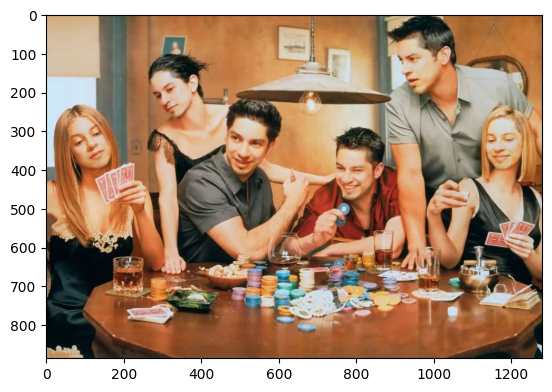

In [29]:

plt.imshow(res[:,:,::-1])
plt.show()